In [2]:
import pickle
sentences = pickle.load(open('./sentences.pkl', 'rb'))

In [3]:
from gensim.models import Word2Vec

In [4]:
print(len(sentences))

2385532


In [5]:
input_gensim = []
for sen in sentences:
    input_gensim.append(sen.split())

In [7]:
# model = Word2Vec(input_gensim, vector_size=128, window=5, min_count=0, workers=4, sg=1)
# model.wv.save("w2v.model")

In [69]:
import gensim.models.keyedvectors as word2vec
w2v_model = word2vec.KeyedVectors.load('w2v.model')

vocabulary = []
for word in w2v_model.index_to_key:
    vocabulary.append(word)
print(len(vocabulary))

173444


In [81]:
keys = ['đẹp', 'xấu']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(w2v_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [76]:
# for word in keys:
#     embeddings = []
#     words = []
#     embeddings.append(w2v_model[word])
#     words.append(word)
    
#     embedding_clusters.append(embeddings)
#     word_clusters.append(words)
    
# print(word_clusters)

[['thưởng_thức_vẻ', 'gợi_cảm', 'tuyệt', 'yêu_vẻ', 'thể_hiện_vẻ', 'sở_hữu_vẻ', 'khả_ái', 'tôn_vinh_vẻ', 'kiêu_sa', 'khoe_vẻ', 'trang_phục_vẻ', 'tôn_vẻ', 'tăng_cường_vẻ', 'bảo_vệ_vẻ', 'chiêm_ngưỡng_vẻ', 'nuột_nà', 'tuyệt_mỹ', 'thuần_chất', 'giữ_gìn_vẻ', 'yêu_kiều', 'đẹp_đẽ', 'mang_vẻ', 'ưa_nhìn', 'xinh_tươi', 'quý_phái', 'khai_thác_vẻ', 'bửc', 'bằng_vẻ', 'thích_vẻ', 'đẹp_duyên_dáng'], ['dịch_chuyển_biến', 'to_chuyện', 'tày_trời', 'đơm_đặt', 'hại', 'chim_chuột', 'đớn', 'một_dụng', 'hậu_họa', 'tày_đình', 'coi_rẻ', 'gian_trá', 'sai_lạc', 'nguy_hại', 'làm_việc_làm', 'xấu_xa', 'hám_lợi', 'đê_tiện', 'bỉ_ổi', 'mỹ_tục_truyền_thống', 'tác_nhân_ảnh_hưởng', 'tủn', 'dung_dưỡng', 'bưng_bít', 'mắc_mớ', 'vọng_ngoại', 'bệnh_nhân_sự', 'bội_tín', 'mất_công_bằng', 'thấp_hèn'], ['đẹp'], ['xấu']]


(2, 30, 128)


E:\anaconda3\envs\NLP\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
E:\anaconda3\envs\NLP\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


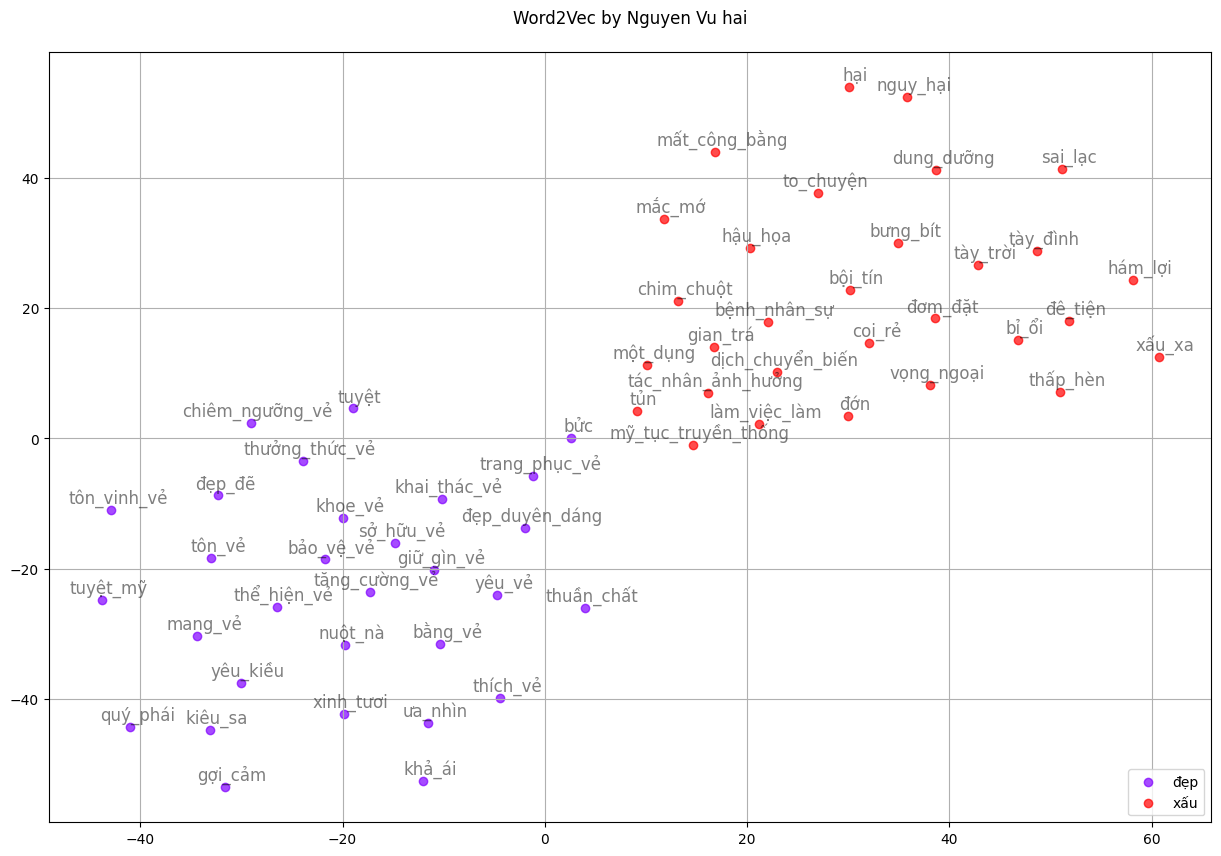

In [84]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
print(embedding_clusters.shape)
n, m, k  = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


import matplotlib.pyplot as plt
import matplotlib.cm as cm
# % matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(15, 10))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=np.array([color,]), alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='center', va='bottom', size=12)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Word2Vec by Nguyen Vu hai\n', keys, embeddings_en_2d, word_clusters, 0.7,
                        'output.png')
